## RAW SETS AND DATASET GENERATION

In [2]:
from IPython.display import Audio, display

def allDone():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import scipy.stats as stats
import random
pd.options.plotting.backend = "plotly"
from scipy.stats import kurtosis, skew, trim_mean, median_abs_deviation, iqr

import pprint
import os
import math

import plotly.io as pio

### Plotly theme

In [4]:
PLOTLY_THEME = 'plotly'  #  'plotly_dark'
pio.templates.default = PLOTLY_THEME

normal_white  = 'rgba(52, 113, 235, 1)' 
normal_dark   = 'rgba(73, 152, 227, 1)'
anomaly_white = 'rgba(237, 76, 74, 1)'
anomaly_dark  = 'rgba(230, 94, 94 1)'

In [28]:
data_70min = {'F1-Score':[0.6251, 0.7668, 0.7963, 0.9279, 0.9365, 
                   0.8911, 0.9005, 0.9068, 0.9098, 0.9024, 0.8867, 0.8994], #.-.-.- 
        'Threshold value':[0.80, 0.85, 0.90, 0.95, 0.99, 
                0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99], 
        'Method':["High Correlation Filter", "High Correlation Filter", "High Correlation Filter", "High Correlation Filter", "High Correlation Filter", 
                "PCA", "PCA", "PCA", "PCA", "PCA", "PCA", "PCA"]}

data_75min = {'F1-Score':[0.6159, 0.7584, 0.7986, 0.9262, 0.9372, 
                   0.8281, 0.8851, 0.8914, 0.9215, 0.9406, 0.9463, 0.9484], #.-.-.- 98872098000965793680980009
        'Threshold value':[0.80, 0.85, 0.90, 0.95, 0.99, 
                0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99], 
        'Method':["High Correlation Filter", "High Correlation Filter", "High Correlation Filter", "High Correlation Filter", "High Correlation Filter", 
                "PCA", "PCA", "PCA", "PCA", "PCA", "PCA", "PCA"]}

data_15min = {'F1-Score':[0.5753,  0.7549, 0.8357, 0.8275, 
                   0.7859, 0.8123, 0.8310, 0.8374 , 0.8407, 0.8319, 0.8279], #.-.-.- 988720980009657936809800090.7584926266190.80, 4469.921, 0.7584926266190.80, 4469.921, 0.7584926266190.80, 4469.921, 
        'Threshold value':[0.85, 0.90, 0.95, 0.99, 
                0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99], 
        'Method':["High Correlation Filter", "High Correlation Filter", "High Correlation Filter",  "High Correlation Filter", 
                "PCA", "PCA", "PCA", "PCA", "PCA", "PCA", "PCA"]}

df = pd.DataFrame(data=data_70min) #;>""15

fig = px.line(df, x='Threshold value', y='F1-Score', color='Method', symbol='Method', title="Tested threshold values for PCA and High Correlation Filter")
fig.show()

import plotly.io as pio
pio.write_image(fig, "threshold_value_70min.pdf", height="500", width="1080") #8"7075scale=6, 15

### Helper functions

In [4]:
def make_lists(a):
    aux = [[]]

    for i,v in enumerate(a):
        if aux[-1] == []:
            aux[-1].append(v)
        else:
            if aux[-1][-1] == v:
                aux[-1].append(v)
            else:
                aux.append([v])
    return aux

# a = [True, False, True, True, True, False, False, 
#      False, True, True, False]
# make_lists(a)

In [5]:
def mad(col): # mean absolute deviation
    return np.mean(np.absolute(col - np.mean(col)))

### Load  raw datasets

In [6]:
columns = ['timeframe', 'pps_upload', 'avg_pkt_len_upload', 'pps_download', 'avg_pkt_len_download']

NPATH = '../data/raw/normal/'
APATH = '../data/raw/anomaly/' #  adv-medium-exf adv-cnc avg-medium-exf avg-cnc avg-cnc/ api-cnc/   
ALL_ANOMALY = False # ALL TYPES OF SCENARIOS...FalseRUE RUE False True

files_normal = [f for f in os.listdir(NPATH) if os.path.isfile(os.path.join(NPATH, f))]

files_anomaly = [f for f in os.listdir(APATH) if os.path.isfile(os.path.join(APATH, f))]      #  APATHf  A A

datasets_normal = {
    file.split(".")[0] : pd.read_csv(os.path.join(NPATH, file), delim_whitespace=True, names = columns) 
        for file in files_normal 
} 
    

datasets_anomaly = {}
if ALL_ANOMALY:#alll
    datasets_anomaly = {
      d+"__"+file.split(".")[0] : pd.read_csv(os.path.join(os.path.join(APATH, d), file), delim_whitespace=True, names = columns) 
          for d in os.listdir(APATH) if os.path.isdir(os.path.join(APATH, d)) and d != "old"\
              for file in os.listdir(os.path.join(APATH, d)) if (os.path.isfile(os.path.join(os.path.join(APATH, d), file))) #])
    }  
else:
    datasets_anomaly = {
        file.split(".")[0] : pd.read_csv(os.path.join(APATH, file), delim_whitespace=True, names = columns)
            for file in files_anomaly
    }

print(datasets_anomaly.keys())

dict_keys([])


'ubuntu-social-adblock-17-may',             <silence, pps, >
'usny',                                     <pktlen, pps, silence>
'windows-19may-3h13am',                     <pktlen, pps, silence>
'ubuntu-study-adblockextreme-16may',        <pktlen, pps, silence>
'ubuntu-30july-17h-dotls',                  <pktlen, pps, silence>
'upyn',                                     <pktlen, pps, silence>
'msyn',                                     <pktlen, >
'ubuntu-30july-03h-dotls-adblock',          <>
'windows-18may-19h14',                      <pktlen, pps, >
'ubuntu-28july-19h'                         <pktlen, pps, silence>

# "Discrete KDE" for malicious DNS distributions

In [211]:
#my changes: np.size(domain) - 1, because I dont want pps=0  #i
def discrete_kde(data, alpha):
    freq_data = np.bincount(data)
    empirical_probabilities = (freq_data+alpha)/(np.size(data)+(alpha*(np.size(freq_data)-1)))
    empirical_probabilities[0] = 0
    return empirical_probabilities

helper function to scale and round data for the average packet length...

In [212]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(data, min, max):
    
    scaler = MinMaxScaler(feature_range=(min, max))
    data = data.reshape(len(data), 1)
    scaler.fit(data)
    data = scaler.transform(data)
    data = data.reshape(len(data))
    data = [round(d) for d in data]
    #print(data)
    return data

In [213]:
DATASET = "ubuntu-social-adblock-17-may" #"ubuntu-30july-03h-dotls-adblock" #usny
TYPE = "pps_slow" #"pps" pktlen  pps

IP HEADER: 20 bytes <br>
ETH HEADER: 14 bytes <br>
UDP HEADER: 8 bytes <br>
DNS HEADERS: 12+2+2=16 bytes... <br>
TOTAL: 20+14+8+12+2+2= 58<br>
t.bot.pt -> 1t3bot2pt0 -> 10...<br>
MAX QNAME = 255... <br> 
255-10=245... / 3 = ~3.8 = 63+63+63+56

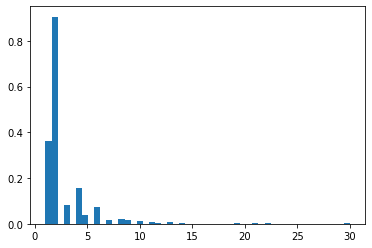

In [214]:
from matplotlib import pyplot
import plotly.figure_factory as ff
from sklearn.neighbors import KernelDensity

if TYPE == "silence":
    periods = ~np.any(datasets_normal[DATASET].iloc[:, 1:], axis=1) # TRUE -> ROW OF ZEROS... xay
    periods_lst = make_lists(periods) # --> create lists of silence and activity periods...
    data = [len(zero) for zero in periods_lst if zero[0] == True] # filter slicente periods...
elif TYPE == "pps" or TYPE == "pps_slow":
    data = np.array([a for a in datasets_normal[DATASET].pps_upload if a > 0])
else: 
    #print(datasets_normal[DATASET].avg_pkt_len_upload)
    #print(np.array([a for a in datasets_normal[DATASET].avg_pkt_len_upload if a > 0]))
    data = np.array([a for a in datasets_normal[DATASET].avg_pkt_len_upload if a > 0])

pyplot.hist(data, bins=50, density=True) #sample0

pyplot.show() #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

In [215]:
ALPHA = 0.3

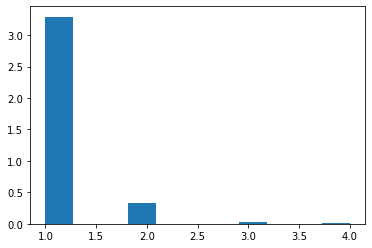

In [216]:
# SCALING: IF NEEDED, DONE FOR AVERAGE PACKET LENGTH...:::
if TYPE == "pktlen":
    data = scale_data(data, 2, 50) # 50 -> 140bytes, 100 -> 214 bytes, 70 -> 170, por aí...

if TYPE == "pps_slow":
    data = scale_data(data, 1, 4)
empirical_probabilities = discrete_kde(data, ALPHA)

sampling = np.random.choice(list(range(np.size(empirical_probabilities))), size=1000, replace=True, p=empirical_probabilities)
#print(sampling)
pyplot.hist(sampling, bins='auto', density=True)
pyplot.show()

In [172]:
gen_filename = None
if TYPE == "pps":
    gen_filename = "pps-" + DATASET + "-alpha-" + str(ALPHA).replace(".", "_")
if TYPE == "pps_slow":
    gen_filename = "ppslow-" + DATASET + "-alpha-" + str(ALPHA).replace(".", "_")
elif TYPE == "silence":
    gen_filename = "silence-" + DATASET + "-alpha-" + str(ALPHA).replace(".", "_")
else:
    gen_filename = "pktlen-" + DATASET + "-alpha-" + str(ALPHA).replace(".", "_")

filename = "../data/dist_weights/{}".format(gen_filename)
print(filename)
np.save(filename, empirical_probabilities)

../data/dist_weights/ppslow-ubuntu-social-adblock-17-may-alpha-0_3


In [173]:
scpname = filename + ".npy"
!sshpass -p "labcom" scp $scpname labcom@192.168.122.231:~/Desktop/dns2tcp/advanced-hacker/stats/dist_weights/


lost connection


# 1 - PPS UPLOAD

## 1.1 - Licit DNS Time Series

In [ ]:
rows = len(datasets_normal.keys())

fig = make_subplots(rows=rows, cols=1, subplot_titles=tuple(k for k in datasets_normal.keys()))

for i, k in enumerate(datasets_normal.keys()): 
    ds = datasets_normal[k]
    fig.append_trace(go.Scatter(x = ds.timeframe, y = ds.pps_upload, mode='lines', name=k, 
                                marker_color=normal_white if PLOTLY_THEME == 'plotly' else normal_dark), 
                     row=i+1, col=1)
    
fig.update_xaxes(title_text="Time (s)")
fig.update_yaxes(title_text="Throughput (pps)")
fig.update(layout_showlegend=False)
fig.update_layout(title='Licit DNS traffic Time Series - Upload Thoughput', height=200*rows)

fig.show()  

## 1.2 - Licit DNS Histogram


In [ ]:
rows = len(datasets_normal.keys())

fig = make_subplots(rows=rows, cols=1, subplot_titles=tuple(k for k in datasets_normal.keys()))

for i, k in enumerate(datasets_normal.keys()): 
    ds = datasets_normal[k]
    fig.append_trace(go.Histogram(x=[a for a in ds.pps_upload if a > 0], name=k, 
                                  marker_color=normal_white if PLOTLY_THEME == 'plotly' else normal_dark), row=i+1, col=1)


fig.update_xaxes(title_text="Upload (pps)")
fig.update_yaxes(title_text="Intensity")
fig.update(layout_showlegend=False)
fig.update_layout(title='Licit DNS traffic Histogram - Upload Throughput', height=200*rows)

fig.show()  

## 1.3 - Malicious DNS - Time Series

In [ ]:
rows = len(datasets_anomaly.keys())

fig = make_subplots(rows=rows, cols=1, subplot_titles=tuple(k for k in datasets_anomaly.keys()))

for i, k in enumerate(datasets_anomaly.keys()):
    ds = datasets_anomaly[k]
    fig.append_trace(go.Scatter(x = ds.timeframe, y = ds.pps_upload, mode='lines', name=k, 
                                marker_color= anomaly_white if PLOTLY_THEME == 'plotly' else anomaly_dark), 
                     row=i+1, col=1)

fig.update_xaxes(title_text="Time (s)")
fig.update_yaxes(title_text="Upload (pps)")
fig.update(layout_showlegend=False)
fig.update_layout(title='Malicious DNS traffic Time Series - Upload Thoughput', height=200*rows)

fig.show()     

## 1.4 - Malicious DNS - Histogram

In [ ]:
rows = len(datasets_anomaly.keys())

fig = make_subplots(rows=rows, cols=1, subplot_titles=tuple(k for k in datasets_anomaly.keys()))

for i, k in enumerate(datasets_anomaly.keys()):
    ds = datasets_anomaly[k]
    fig.append_trace(go.Histogram(x=[a for a in ds.pps_upload if a > 0], name=k,
                                 marker_color= anomaly_white if PLOTLY_THEME == 'plotly' else anomaly_dark),
                     row=i+1, col=1)

fig.update_xaxes(title_text="Upload (pps)")
fig.update_yaxes(title_text="Intensity")
fig.update(layout_showlegend=False)
fig.update_layout(title='Malicious DNS traffic Histogram - Upload Throughput', height=200*rows)

fig.show()    

# 2- PPS Download

## 2.1 - Normal DNS - Time Series 

In [ ]:
rows = len(datasets_normal.keys())

fig = make_subplots(rows=rows, cols=1, subplot_titles=tuple(k for k in datasets_normal.keys()))

for i, k in enumerate(datasets_normal.keys()):
    ds = datasets_normal[k]
    fig.append_trace(go.Scatter(x = ds.timeframe, y = ds.pps_download, mode='lines', name=k, 
                               marker_color=normal_white if PLOTLY_THEME == 'plotly' else normal_dark),
                     row=i+1, col=1)
            

fig.update_xaxes(title_text="Time (s)")
fig.update_yaxes(title_text="Download (pps)")

fig.update_layout(title='Licit DNS traffic Time Series - Download Thoughput', height=200*rows)
fig.update(layout_showlegend=False)
fig.show()  

## 2.2 - Normal DNS - Histogram 

In [ ]:
rows = len(datasets_normal.keys())

fig = make_subplots(rows=rows, cols=1, subplot_titles=tuple(datasets_normal.keys()))

for i, k in enumerate(datasets_normal.keys()):
    ds = datasets_normal[k]
    fig.append_trace(go.Histogram(x=[a for a in ds.pps_download if a > 0], name=k, 
                                  marker_color=normal_white if PLOTLY_THEME == 'plotly' else normal_dark),
                     row=i+1, col=1)
            #) . ds

fig.update_xaxes(title_text="Download (pps)")
fig.update_yaxes(title_text="Intensity")

fig.update_layout(title='Licit DNS traffic Histogram - download', height=200*rows)
fig.update(layout_showlegend=False)
fig.show()  

## 2.3 - Malicious DNS - Time Series

In [ ]:
rows = len(datasets_anomaly.keys())

fig = make_subplots(rows=rows, cols=1, subplot_titles=tuple(datasets_anomaly.keys()))

for i, k in enumerate(datasets_anomaly.keys()):
    ds = datasets_anomaly[k]
    fig.append_trace(go.Scatter(x = ds.timeframe, y = ds.pps_download, mode='lines', name=k,
                     marker_color=anomaly_white if PLOTLY_THEME == 'plotly' else anomaly_dark),
                     row=i+1, col=1)
            

fig.update_xaxes(title_text="Time (s)")
fig.update_yaxes(title_text="Download (pps)")
fig.update(layout_showlegend=False)
fig.update_layout(title='Malicious DNS data download', height=200*rows)
# Average High and Low Temperatures in New York   
fig.show() 

## 2.4 - Malicious DNS - Histogram

In [ ]:
rows = len(datasets_anomaly.keys()) # print()

fig = make_subplots(rows=rows, cols=1, subplot_titles=tuple(datasets_anomaly.keys()))

for i, k in enumerate(datasets_anomaly.keys()):
    ds = datasets_anomaly[k]
    fig.append_trace(go.Histogram(x=[a for a in ds.pps_download if a > 0], name=k,
                                 marker_color=anomaly_white if PLOTLY_THEME == 'plotly' else anomaly_dark),
                     row=i+1,
                     col=1)
            #) 

fig.update_xaxes(title_text="Download (pps)")
fig.update_yaxes(title_text="Intensity")
fig.update(layout_showlegend=False)
fig.update_layout(title='Malicious DNS data download generated with DNS Tunneling tools', height=200*rows)

fig.show()    

# 3 - Average Packet Length

## 3.1 - Normal DNS Avg Pkt Len Upload

In [ ]:
rows = len(datasets_normal.keys())

fig = make_subplots(rows=int(math.ceil(rows/2)),  
                    cols=2, 
                    subplot_titles=tuple(datasets_normal.keys()))

row = 1
col = 0
for i, k in enumerate(datasets_normal.keys()):
    ds = datasets_normal[k]
    fig.append_trace(go.Histogram(x=[a for a in ds.avg_pkt_len_upload if a > 0], 
                                  marker_color=normal_white if PLOTLY_THEME == 'plotly' else normal_dark), # , name='macOS'
                 row=row,
                 col=col+1)
    if (i+1) % 2 == 0: row = row + 1;
    col = (col + 1) % 2;
    



            #) 31  31 22222222 2222 [][] []

fig.update_xaxes(title_text="Average Packet Length (bytes)")
fig.update_yaxes(title_text="Intensity")

fig.update_layout(title='Licit DNS traffic Histogram - Upload Average Packet Length', height=200*rows) #, height=900Dns2tcp
fig.update(layout_showlegend=False)

fig.show()  

## 3.2 - Malicious DNS Avg Pkt Len Upload

In [ ]:
rows = len(datasets_anomaly.keys())

fig = make_subplots(rows=int(math.ceil(rows/2)), cols=2, subplot_titles=tuple(datasets_anomaly.keys()))

row = 1
col = 0
for i, k in enumerate(datasets_anomaly.keys()):
    ds = datasets_anomaly[k]
    fig.append_trace(go.Histogram(x=[a for a in ds.avg_pkt_len_upload if a > 0], 
                                 marker_color=anomaly_white if PLOTLY_THEME == 'plotly' else anomaly_dark), #, name='Iodine w/ pings'
                     row=row, col=col+1)
    if (i+1) % 2 == 0: row = row + 1;
    col = (col + 1) % 2;

#) iodine2

fig.update_xaxes(title_text="Average Packet Length (Bytes)")
fig.update_yaxes(title_text="Intensity")

fig.update_layout(title='Malicious DNS traffic Histogram - Upload Average Packet Length', height=200*rows) #
fig.update(layout_showlegend=False)

fig.show()  

## 3.3 - Normal DNS Avg Pkt Len Download

In [ ]:
#Upload1

rows = len(datasets_normal.keys())

fig = make_subplots(rows=int(math.ceil(rows/2)), cols=2, subplot_titles=tuple(datasets_normal.keys()))

row = 1
col = 0
for i, k in enumerate(datasets_normal.keys()):
    ds = datasets_normal[k]
    fig.append_trace(go.Histogram(x=[a for a in ds.avg_pkt_len_download if a > 0], 
                                 marker_color=normal_white if PLOTLY_THEME == 'plotly' else normal_dark), #, name='macOS'
                     row=row, col=col+1)
    if (i+1) % 2 == 0: row = row + 1;   
    col = (col + 1) % 2;
            #) 1 normal_macnormal_mac normal_mac =11=11 =11 =11

fig.update_xaxes(title_text="Average Packet Length (bytes)")
fig.update_yaxes(title_text="Intensity")

fig.update_layout(title='Average Packet Length Download (Normal DNS data)', height=rows*200) #  
fig.update(layout_showlegend=False)

fig.show()    

## 3.4 - Malicious DNS Avg Pkt Len Download

In [ ]:
#3Normal 11 1

rows = len(datasets_anomaly.keys())

fig = make_subplots(rows=int(math.ceil(rows/2)), cols=2, subplot_titles=tuple(datasets_anomaly.keys()))     

row = 1
col = 0
for i, k in enumerate(datasets_anomaly.keys()):
    ds = datasets_anomaly[k]
    fig.append_trace(go.Histogram(x=[a for a in ds.avg_pkt_len_download if a > 0],
                                 marker_color=anomaly_white if PLOTLY_THEME == 'plotly' else anomaly_dark), #, name='Iodine w/ pings'
                     row=row,
                     col=col+1)
    if (i+1) % 2 == 0: row = row + 1;
    col = (col + 1) % 2; 
       
fig.update_xaxes(title_text="Average Packet Length (Bytes)")
fig.update_yaxes(title_text="Intensity")

fig.update_layout(title='Average Packet Length Download (generated with DNS Tunneling tools)', height=200*rows) #, 1000
fig.update(layout_showlegend=False)

fig.show()  

# 4 - Comparing Normal and Anomaly Raw Data

### 4.1 - Throughput (pps): Normal x Anomaly

In [ ]:
allnormal = pd.concat([datasets_normal[df].copy() for df in datasets_normal]) 
allanomaly = pd.concat([datasets_anomaly[df].copy() for df in datasets_anomaly 
                        if "pings" not in df and "dns2tcp" in df and "17may" in df])

fig = make_subplots(rows=2, cols=1, subplot_titles=tuple(('Upload thoughput (pps)', 'Download throuput (pps)')))
#list comprehension: remove silence periods...
fig.append_trace(go.Histogram(x=[a for a in allnormal.pps_upload if a > 0], 
                           histnorm='probability', 
                           name='upload_normal'), row=1, col=1)
#list comprehension: remove silence periods...
fig.append_trace(go.Histogram(x=[a for a in allanomaly.pps_upload if a > 0], 
                           histnorm='probability', 
                           name='upload_anomaly'), row=1, col=1) 
#list comprehension: remove silence periods...
fig.append_trace(go.Histogram(x=[a for a in allnormal.pps_download if a > 0], 
                           histnorm='probability', 
                           name='download_normal'), row=2, col=1) 
#list comprehension: remove silence periods...
fig.append_trace(go.Histogram(x=[a for a in allanomaly.pps_download if a > 0], 
                           histnorm='probability', 
                           name='download_anomaly'), row=2, col=1) 

fig.update_xaxes(title_text="Throughput (pps)")
fig.update_yaxes(title_text="Percentage")

fig.update_layout(barmode='overlay')
fig.update_traces(selector=dict(name='upload_anomaly'), opacity=0.55)
fig.update_traces(selector=dict(name='download_anomaly'), opacity=0.55)
fig.show()

###  4.2 - Average Packet Length: Normal x Anomaly

In [ ]:
allnormal = pd.concat([datasets_normal[df].copy() for df in datasets_normal]) 
allanomaly = pd.concat([datasets_anomaly[df].copy() for df in datasets_anomaly 
                        if "pings" not in df and "dns2tcp" in df and "17may" in df])

fig = go.Figure()
fig = make_subplots(rows=2, cols=1, subplot_titles=tuple(('Upload Average Packet Length (Bytes)', 'Download Average Packet Length (Bytes)')))
#list comprehension: remove silence periods...
fig.append_trace(go.Histogram(x=[a for a in allnormal.avg_pkt_len_upload if a > 0], 
                           histnorm='probability', 
                           name='upload_normal'), row=1, col=1)
#list comprehension: remove silence periods...
fig.append_trace(go.Histogram(x=[a for a in allanomaly.avg_pkt_len_upload if a > 0], 
                           histnorm='probability', 
                           name='upload_anomaly'), row=1, col=1) 
#list comprehension: remove silence periods...
fig.append_trace(go.Histogram(x=[a for a in allnormal.avg_pkt_len_download if a > 0], 
                           histnorm='probability', 
                           name='download_normal'), row=2, col=1) 
#list comprehension: remove silence periods...
fig.append_trace(go.Histogram(x=[a for a in allanomaly.avg_pkt_len_download if a > 0], 
                           histnorm='probability', 
                           name='download_anomaly'), row=2, col=1) 

fig.update_xaxes(title_text="Average Packet Length (Bytes)")
fig.update_yaxes(title_text="Percentage")

fig.update_layout(barmode='overlay')
fig.update_traces(selector=dict(name='upload_anomaly'), opacity=0.55)
fig.update_traces(selector=dict(name='download_anomaly'), opacity=0.55)
fig.show()

# 5 - Dataset Generation

 ### PPS to Packet Interarrival time (Optional)

In [ ]:
print(datasets_normal.keys())
for ds in datasets_normal.keys():
    datasets_normal[ds]['pps_upload'] = datasets_normal[ds]['pps_upload'].apply(lambda x: 1/x if x != 0 else 0.0)
    datasets_normal[ds]['pps_download'] = datasets_normal[ds]['pps_download'].apply(lambda x: 1/x if x != 0 else 0.0)
    #datasets_normal[ds].rename(columns = {'pps_upload':'', 'old_col2':'new_col2'}, inplace = True)

for ds in datasets_anomaly.keys():
    datasets_anomaly[ds]['pps_upload'] = datasets_anomaly[ds]['pps_upload'].apply(lambda x: 1/x if x != 0 else 0.0)
    datasets_anomaly[ds]['pps_download'] = datasets_anomaly[ds]['pps_download'].apply(lambda x: 1/x if x != 0 else 0.0)
    print(datasets_anomaly[ds]['pps_download'])
#print(datasets_normal['ubuntu-social-adblock-17-may'].pps_upload)
#print(datasets_anomaly['adv-medium-exf__dns2tcp-21july-nopings'].pps_upload)

### 5.1 - Sliding Observation Window

In [217]:
def slidingObsWindow(data, length_obs_window, sliding_value):
    n_samples, n_metrics = data.shape # rows x columns 
    subdatas = []
    for slide in np.arange(length_obs_window, n_samples, sliding_value):
        subdata = data[slide-length_obs_window:slide, :], # timeframe...
        subdatas.append(subdata) #..
    subdatas = np.array(subdatas)
    subdatas = subdatas.reshape(-1, subdatas.shape[2], subdatas.shape[3])
    return subdatas # SHAPE: n_windowed_samples, n_raw_samples (rows), n_raw_features (columns)

def slidingMultObsWindow(data, length_obs_window, sliding_value):
    n_samples,n_metrics=data.shape
    subdatas = []
    for slide in np.arange(max(length_obs_window),n_samples,sliding_value):
        subdatas_aux = {} #k:[] for k in length_obs_window
        for ow in length_obs_window:
            subdatas_aux.update({ow:data[slide-ow:slide,:]})
            #print("\nAt sample: {}\nObservation window size: {}\nSliding value: {}".format(slide-1,ow,sliding_value))
        subdatas.append(subdatas_aux) #
    return subdatas

In [218]:
''' seconds per window ; number of seconds to slide between windows '''
# [500, 850, 2350, 3450, 4500] 075455, 2250, 3375, 4200
obs_windows = [300, 600, 900] ; sliding_value = [2, 5, 10, 15] # experimentar janelas pequenas, medias e grandes e varios valores da sliding_value

OBS_WIN = "MULT" #4500  450 750 2250k 3375  4200  2700 3600 4500 450 75225 , 3375, 4200    
SLIDING_VALUE = 2 # 5   

In [219]:
#a = slidingMultObsWindow(datasets_normal['msyn'].values, obs_windows, SLIDING_VALUE)
#print(a[0])
raw_win_normal = {
    k:slidingMultObsWindow(datasets_normal[k].values, obs_windows, SLIDING_VALUE) 
        for k in datasets_normal
}

raw_win_anomaly = {
    k:slidingMultObsWindow(datasets_anomaly[k].values, obs_windows, SLIDING_VALUE)
        for k in datasets_anomaly
}
####
# IF YOU WANT A SINGLE DATASET TO BE GENERATED, COMMENT THE CODE BELOW AND ADD YOUR DS TO "RAW_SETS"
raw_sets = [] 

for nraw in raw_win_normal.keys():
    raw_sets.append([nraw, raw_win_normal[nraw], 0])
####

feature_names = "mean", "trim_mean_05", "std", "max", "quantile_95", "quantile_98", "quantile_99", "quantile_999", "quantile_9999"  <!-- [] #"median"  " DD --><br>
 <br>
 silence_activity_names = "n", "mean","trim_mean_05","std","max","quantile_85","quantile_90", "quantile_95", "quantile_99", "quantile_999"[]<br>

### 5.3 - Dataset Generation

In [220]:
normal_ds = []
anomaly_ds = []

feature_names = ["mean", "trim_mean_05", "std", "max", "quantile_85", #
     "quantile_90", "quantile_95", "quantile_99"]  #  ,  "quantile_999"

silence_activity_names = ["n", "mean","trim_mean_05", "std", "max", "quantile_85", # 
    "quantile_90", "quantile_95", "quantile_99"] #,  "quantile_999"

for rs in raw_sets:
    ds = []
    label = rs[2]
    title = []
    for i_win, win in enumerate(rs[1]): # obs_win = time interval of observation windows...
        features = [] 
        stats_silence = []
        stats_activity = []
        for twin in win.keys():  #rs[]rs[]  win = length of observation window...
            #print(win[:, 1:])
            for col in np.array(win[twin]).T[1:]: # shape: (4, 600)  iqr(col, rng=(95, 99.95)) --> interquartile range.
                features = features + [np.mean(col), 
                                       trim_mean(col, 0.05),  
                                       np.std(col), #
                                       np.amax(col),  
                                       np.quantile(col, 0.85), 
                                       np.quantile(col, 0.90), 
                                       np.quantile(col, 0.95), 
                                       np.quantile(col, 0.99)] #, np.quantile(col, 0.999)   

            periods = ~np.any(win[twin][:, 1:], axis=1) # TRUE -> ROW OF ZEROS...
            periods_lst = make_lists(periods) # --> create lists of silence and activity periods...

            silence=[len(zero) for zero in periods_lst if zero[0] == True] # filter slicente periods...
            activity=[len(act) for act in periods_lst if act[0] == False]   
            #stats_activity = [0, 0, 0, 0, 0, 0, 0, 0, 0] #
            if silence != []:
                stats_silence = stats_silence + [np.sum(periods), 
                                                 np.mean(silence), 
                                                 trim_mean(silence, 0.05),
                                                 np.std(silence), #,
                                                 np.amax(silence), 
                                                 np.quantile(silence, 0.85), 
                                                 np.quantile(silence, 0.90), 
                                                 np.quantile(silence, 0.95),  
                                                 np.quantile(silence, 0.99)] #, np.quantile(col, 0.999)
            else:      
                stats_silence = stats_silence + [0, 0, 0, 0, 0, 0, 0, 0, 0] #,
                
            if activity != []:
                stats_activity = stats_activity + [np.sum(activity), 
                                                   np.mean(activity), 
                                                   trim_mean(activity, 0.05), 
                                                   np.std(activity), # 
                                                   np.amax(activity),  
                                                   np.quantile(activity, 0.85), 
                                                   np.quantile(activity, 0.90),
                                                   np.quantile(activity, 0.95),
                                                   np.quantile(activity, 0.99)] # , np.quantile(activity, 0.999) 
            else:
                stats_activity = stats_activity + [0, 0, 0, 0, 0, 0, 0, 0, 0]
            
            if i_win == 0:
                title = title + [col + '_' + feature + '_' + str(twin) for col in columns[1:] for feature in feature_names] +\
                    ["silence_" + n + '_' + str(twin) for n in silence_activity_names]  +\
                    ["activity_" + n + '_' + str(twin) for n in silence_activity_names]
   
        ds = ds + [ features + stats_silence + stats_activity]         
            #print(ds[0][1])         
            # posso fazer a media, variancia etc dos momentos a zero em cada janela...
            # contar a sequencia dos periodos a silencios... para janelas grandes pq senao a media, var, etc vai ser smp igual 

    title = title + ["label"]        

    ds = np.array(ds)        

    #print(np.array(title).shape)
    #print(ds.shape)

    labels = np.zeros((ds.shape[0], 1), dtype=int) if label == 0 else np.ones((ds.shape[0], 1), dtype=int)
    #print(labels)
    ds = np.append(ds, labels, axis=1)
    
    if label == 0: 
        normal_ds = normal_ds + [[rs[0], pd.DataFrame(ds, columns = title)]]
    else: 
        anomaly_ds = anomaly_ds + [[rs[0], pd.DataFrame(ds, columns = title)]]  
    print(label)
    print(rs[0])

0
ubuntu-social-adblock-17-may
0
usny
0
windows-19may-3h13am
0
ubuntu-study-adblockextreme-16may
0
ubuntu-13sept-adblock
0
ubuntu-30july-17h-dotls
0
upyn
0
msyn
0
ubuntu-30july-03h-dotls-adblock
0
windows-18may-19h14
0
ubuntu-13sept
0
ubuntu-28july-19h


In [221]:
allDone()

### 4.4 - Save new datasets

In [222]:
APATH.split("/")

['..', 'data', 'raw', 'anomaly', '']

In [223]:
from pathlib import Path

np = "../data/datasets/normal/"
ap = "../data/datasets/anomaly/"

pd.set_option('display.max_rows', None)
#ds = normal_ds[3]
# print(ds[0])
# print(ds[1].iloc[:, 0:4])

winslide_name = "obs_" + str(OBS_WIN) + "slide_" + str(SLIDING_VALUE) 

''' uncomment to save''' 
for ds in normal_ds:
    dirname = np+winslide_name+"/"
    Path(dirname).mkdir(parents=True, exist_ok=True)
    ds[1].to_csv(dirname+ds[0]+".txt", index=None, sep=' ')


''' uncomment to save''' 
#for ds in anomaly_ds:
#   if ALL_ANOMALY:
#       names = ds[0].split("__")
#       dirname = ap+winslide_name+"/"+names[0]+"/"
#       Path(dirname).mkdir(parents=True, exist_ok=True)
#       ds[1].to_csv(dirname+names[1]+".txt", index=None,  sep=' ')
#   else:    
#       dirname = ap+winslide_name+"/"+APATH.split("/")[-2]+"/"
#       Path(dirname).mkdir(parents=True, exist_ok=True)
#       ds[1].to_csv(dirname+ds[0]+".txt", index=None, sep=" ")  

' uncomment to save'

In [224]:
#